<a href="https://colab.research.google.com/github/Hemanthmuthyal/MLassignment2/blob/main/PlayTennis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Hemanth/HW2_ML_DS/playtennis/PlayTennis.csv')

In [4]:
df

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [5]:
df.outlook.unique()

array(['sunny', 'overcast', 'rainy'], dtype=object)

In [6]:
df.temp.unique()

array(['hot', 'mild', 'cool'], dtype=object)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   outlook   14 non-null     object
 1   temp      14 non-null     object
 2   humidity  14 non-null     object
 3   windy     14 non-null     bool  
 4   play      14 non-null     object
dtypes: bool(1), object(4)
memory usage: 590.0+ bytes


In [8]:
le = LabelEncoder()

In [9]:
for column in df.columns:
    if df[column].dtype == object:
        df[column] = le.fit_transform(df[column])


In [10]:
print(df)

    outlook  temp  humidity  windy  play
0         2     1         0  False     0
1         2     1         0   True     0
2         0     1         0  False     1
3         1     2         0  False     1
4         1     0         1  False     1
5         1     0         1   True     0
6         0     0         1   True     1
7         2     2         0  False     0
8         2     0         1  False     1
9         1     2         1  False     1
10        2     2         1   True     1
11        0     2         0   True     1
12        0     1         1  False     1
13        1     2         0   True     0


In [11]:

# Create dummy variables for categorical columns, dropping one column for each variable
df = pd.get_dummies(df, columns=['outlook', 'temp', 'humidity', 'windy','play'], drop_first=True)

# Print the updated dataset
print(df)


    outlook_1  outlook_2  temp_1  temp_2  humidity_1  windy_True  play_1
0           0          1       1       0           0           0       0
1           0          1       1       0           0           1       0
2           0          0       1       0           0           0       1
3           1          0       0       1           0           0       1
4           1          0       0       0           1           0       1
5           1          0       0       0           1           1       0
6           0          0       0       0           1           1       1
7           0          1       0       1           0           0       0
8           0          1       0       0           1           0       1
9           1          0       0       1           1           0       1
10          0          1       0       1           1           1       1
11          0          0       0       1           0           1       1
12          0          0       1       0           

In [12]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1:]

In [13]:
x

,outlook_1,outlook_2,temp_1,temp_2,humidity_1,windy_True
0,0,1,1,0,0,0
1,0,1,1,0,0,1
2,0,0,1,0,0,0
3,1,0,0,1,0,0
4,1,0,0,0,1,0
5,1,0,0,0,1,1
6,0,0,0,0,1,1
7,0,1,0,1,0,0
8,0,1,0,0,1,0
9,1,0,0,1,1,0


In [14]:
y

,play_1
0,0
1,0
2,1
3,1
4,1
5,0
6,1
7,0
8,1
9,1


In [15]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [16]:
clf = DecisionTreeClassifier(criterion='gini')

In [17]:
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy:",(metrics.accuracy_score(y_test, y_pred))*100)

Accuracy: 100.0


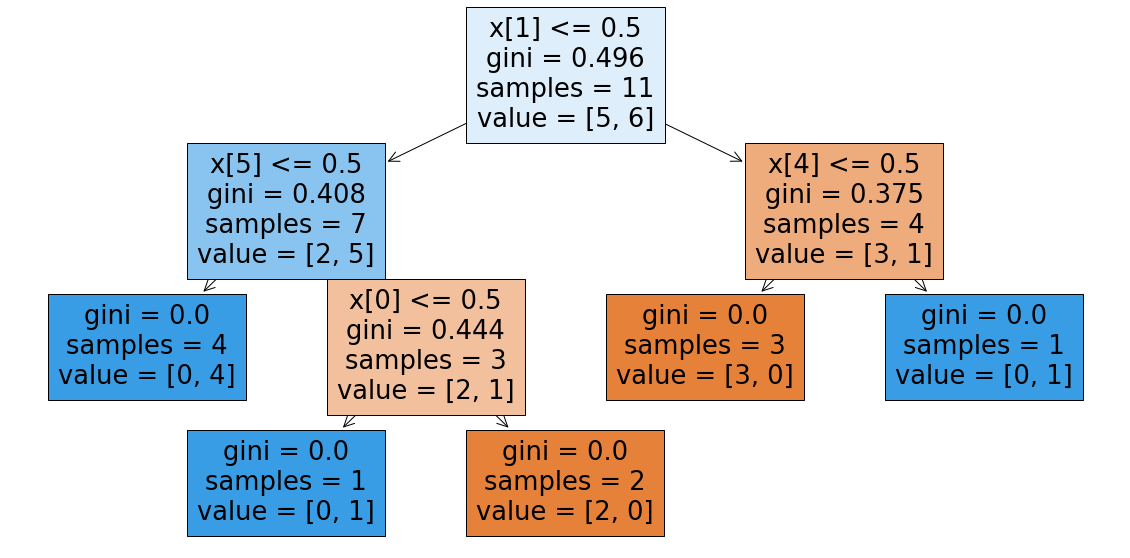

In [18]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
import matplotlib.pyplot as plt
# Visualize decision tree
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True)
plt.show()